In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os, random
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

In [2]:
def clamp(x): 
  return int(max(0, min(x, 255)))

In [3]:
def image_kmeans(img, k): #image preprocessing
  im = cv2.imread(img)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  plt.figure()
  plt.imshow(im)
  plt.show()
  image_reshape = im.reshape((-1, 3))
  
  #k = 2
  kmeans = KMeans(k) #performing kmeans 
  kmeans.fit(image_reshape)
  dominant_colors = kmeans.cluster_centers_.astype('uint8') #centroids return the dominant colors (RGB Value)
  print(dominant_colors)
  np.zeros_like(image_reshape).shape
  print(kmeans.labels_)
  plt.figure()
  for i,color in enumerate(dominant_colors):  #visualizing the palatte
    palette = np.zeros_like(im, dtype='uint8')
    palette[:,:,:] = color
    plt.subplot(1,k,i+1)
    plt.axis("off")
    plt.imshow(palette)
    #print(im.shape)   
  dominant_hex_colors = []
  for i in (dominant_colors):  #converting the RGB value to HEX value
  
    hex = "#{0:02x}{1:02x}{2:02x}".format(clamp(i[0]), clamp(i[1]), clamp(i[2]))
  
    print(hex)
  
    dominant_hex_colors.append(hex)
  
  
  return dominant_colors, dominant_hex_colors

In [4]:
list_folders = ["/content/drive/MyDrive/black_white","/content/drive/MyDrive/quickdraw_train/bicycle", "/content/drive/MyDrive/painting_color/airplane", "/content/drive/MyDrive/quickdraw_train/butterfly","/content/drive/MyDrive/painting_color/garden","/content/drive/MyDrive/painting_color/castle", "/content/drive/MyDrive/painting_color/rainbow","/content/drive/MyDrive/painting_color/mountain" ]

In [8]:
pictures = []  #reading the pictures
for f in list_folders:
    pic = os.listdir(f)
    count = 0
    for i in pic:
     pictures.append(f+"/"+i)
     count = count + 1
    print(count)
      
 


86
350
212
350
213
225
84
319


In [9]:
actual_bw_pic = 786 #actual count of black and white and colored images
actual_color_pic = 1053

In [10]:
pictures

['/content/drive/MyDrive/black_white/clipart_003_000004.jpg',
 '/content/drive/MyDrive/black_white/clipart_003_000029.jpg',
 '/content/drive/MyDrive/black_white/clipart_003_000005.jpg',
 '/content/drive/MyDrive/black_white/clipart_003_000070.jpg',
 '/content/drive/MyDrive/black_white/clipart_004_000024.jpg',
 '/content/drive/MyDrive/black_white/clipart_004_000006.jpg',
 '/content/drive/MyDrive/black_white/clipart_003_000082.jpg',
 '/content/drive/MyDrive/black_white/clipart_003_000085.jpg',
 '/content/drive/MyDrive/black_white/clipart_005_000078.jpg',
 '/content/drive/MyDrive/black_white/clipart_005_000087.jpg',
 '/content/drive/MyDrive/black_white/clipart_006_000032.jpg',
 '/content/drive/MyDrive/black_white/clipart_006_000025.jpg',
 '/content/drive/MyDrive/black_white/clipart_006_000055.jpg',
 '/content/drive/MyDrive/black_white/clipart_006_000016.jpg',
 '/content/drive/MyDrive/black_white/clipart_006_000046.jpg',
 '/content/drive/MyDrive/black_white/clipart_006_000008.jpg',
 '/conte

In [11]:
print(len(pictures))

1839


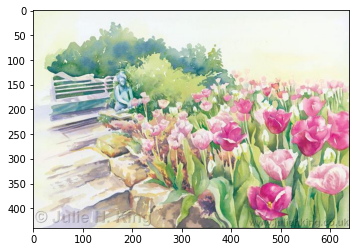

[2268386567.4226856, 805846212.2201457, 493216527.2791116, 382672528.48902273, 300834002.53692853, 256687292.1048557, 231331878.0610103, 207415477.2399241, 188431493.64512748]


In [ ]:
#k means elbow curve on colored image
img = "/content/drive/MyDrive/painting_color/garden/painting_128_000008.jpg"
im = cv2.imread(img)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im)
plt.show()
image_reshape = im.reshape((-1, 3))
em_c=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(image_reshape)
  o=kmeans.inertia_
  em_c.append(o)
print(em_c)

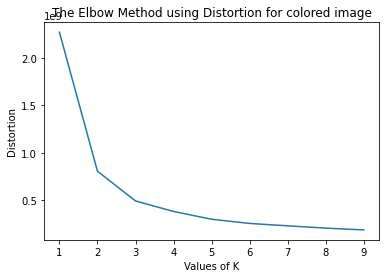

In [ ]:
plt.plot(list(np.arange(1,10)),em_c)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for colored image')

plt.show()

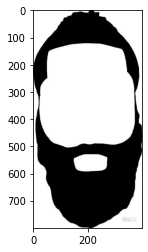

[14842452651.320076, 55773877.50293177, 17665092.5011841, 9728762.919659887, 6057522.455764897, 4661677.824512895, 3354613.6550323786, 2388814.028918136, 1872178.0471917824]


In [ ]:
#k means elbow curve on black and white image
img = "/content/drive/MyDrive/black_white/clipart_025_000104.jpg"
im = cv2.imread(img)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im)
plt.show()
image_reshape = im.reshape((-1, 3))
em_bw=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(image_reshape)
  o=kmeans.inertia_
  em_bw.append(o)
print(em_bw)

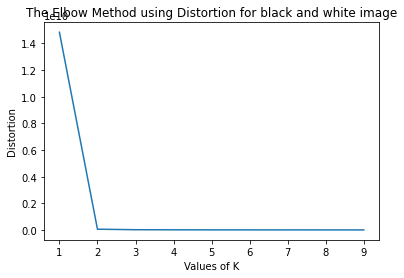

In [ ]:
plt.plot(list(np.arange(1,10)),em_bw)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for black and white image')

plt.show()

In [ ]:
pictures_color =[]
pictures_bw =[]
color_pic = 0
black_white_pic = 0
white = [255, 255, 255] #black and white RGB Value as reference
black = [0,0,0]
white_3d = np.uint8(np.asarray([[white]]))
black_3d = np.uint8(np.asarray([[black]]))
for l in pictures:
  dom_col, dom_hex = image_kmeans(l,2) #performing k means on all the pictures k = 2 and returning the centroids (RGB value of dominant colors)
  dom_col = np.array(dom_col)
  dom_col_1 = dom_col[0]
  dom_col_2 = dom_col[1]
  dif_white = deltaE_cie76(rgb2lab(white_3d),rgb2lab(dom_col_1)) #converting the RGB values to CIE Labspace and calculating the distance between the colors
  dif_black = deltaE_cie76(rgb2lab(black_3d),rgb2lab(dom_col_2))
  #print("diff_white=", dif_white)
  #print("diff_black=", dif_black)
  if ((dif_white < 10 and dif_black < 50) or ((dif_white >= 85 and dif_white <=101) and (dif_black >= 85 and dif_black <=101))):
    print("black and white")
    black_white_pic = black_white_pic + 1
    pictures_bw.append(l)
  else:
    print("color")
    color_pic = color_pic + 1
    pictures_color.append(l)



In [ ]:
print(color_pic)
print(black_white_pic)

1038
801


In [ ]:
print("No of black and white images in the data:", actual_bw_pic)
print("No of black and white images clustered:", black_white_pic)
print("No of colored images in the data:", actual_color_pic)
print("No of colored images clustered:", color_pic)


No of black and white images in the data: 786
No of black and white images clustered: 801
No of colored images in the data: 1053
No of colored images clustered: 1038


Getting the 3 dominant colors in each image 

In [ ]:
for l in pictures: # 3 dominant colors in the pictures 
  dom_col, dom_hex = image_kmeans(l,3)
  

Because we are visualizing 1839 images the file gets very big to upload on github. So we are sampling some colored and black and white images to show the output


In [15]:
sample_pics =['/content/drive/MyDrive/black_white/clipart_006_000055.jpg', '/content/drive/MyDrive/painting_color/airplane/painting_002_000133.jpg','/content/drive/MyDrive/painting_color/garden/painting_128_000007.jpg','/content/drive/MyDrive/quickdraw_train/butterfly/5885593311510528.png',]

check image is black or white

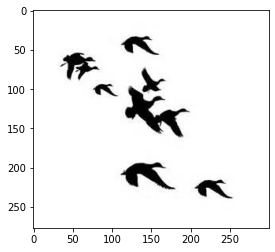

[[ 18  18  18]
 [253 253 253]]
[1 1 1 ... 1 1 1]
#121212
#fdfdfd
black and white


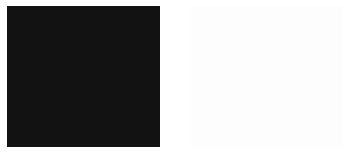

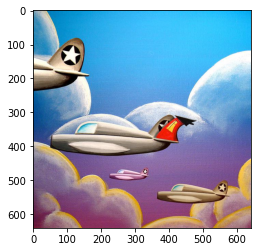

[[133 104 123]
 [107 185 229]]
[1 1 1 ... 0 0 0]
#85687b
#6bb9e5
color


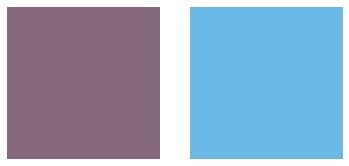

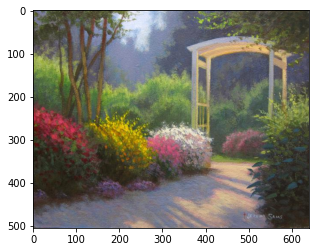

[[ 80  77  62]
 [147 144 132]]
[1 0 1 ... 0 0 0]
#504d3e
#939084
color


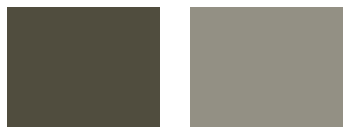

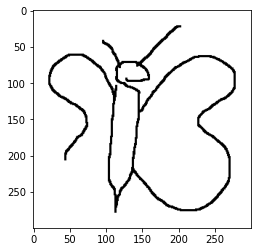

[[254 254 254]
 [  0   0   0]]
[0 0 0 ... 0 0 0]
#fefefe
#000000
black and white


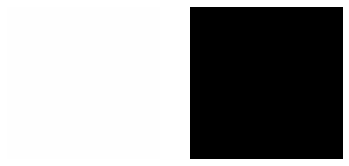

In [16]:
white = [255, 255, 255] #black and white RGB Value as reference
black = [0,0,0]
white_3d = np.uint8(np.asarray([[white]]))
black_3d = np.uint8(np.asarray([[black]]))
for l in sample_pics:
  dom_col, dom_hex = image_kmeans(l,2) #performing k means on all the pictures k = 2 and returning the centroids (RGB value of dominant colors)
  dom_col = np.array(dom_col)
  dom_col_1 = dom_col[0]
  dom_col_2 = dom_col[1]
  dif_white = deltaE_cie76(rgb2lab(white_3d),rgb2lab(dom_col_1)) #converting the RGB values to CIE Labspace and calculating the distance between the colors
  dif_black = deltaE_cie76(rgb2lab(black_3d),rgb2lab(dom_col_2))
  #print("diff_white=", dif_white)
  #print("diff_black=", dif_black)
  if ((dif_white < 10 and dif_black < 50) or ((dif_white >= 85 and dif_white <=101) and (dif_black >= 85 and dif_black <=101))):
    print("black and white")
    
  else:
    print("color")
   

3 dominant colors in images

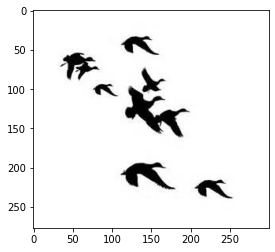

[[254 254 254]
 [  8   8   8]
 [133 133 133]]
[0 0 0 ... 0 0 0]
#fefefe
#080808
#858585


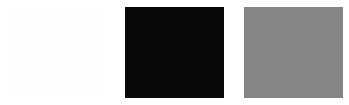

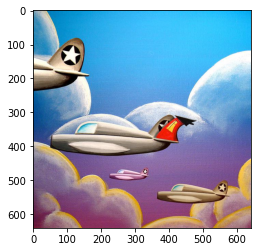

[[123  93 121]
 [ 68 172 230]
 [212 204 192]]
[1 1 0 ... 0 0 0]
#7b5d79
#44ace6
#d4ccc0


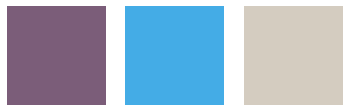

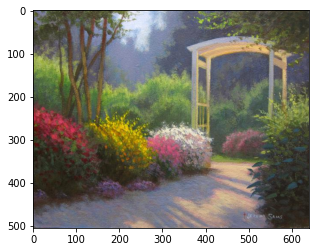

[[171 163 153]
 [111 112  98]
 [ 69  64  49]]
[0 2 1 ... 2 2 2]
#aba399
#6f7062
#454031


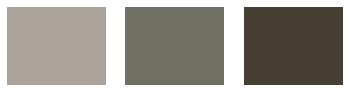

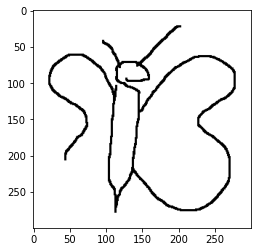

[[  0   0   0]
 [254 254 254]
 [255 255 255]]
[1 1 1 ... 1 1 1]
#000000
#fefefe
#ffffff


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  # This is added back by InteractiveShellApp.init_path()


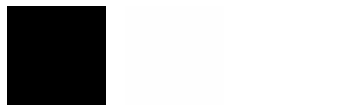

In [17]:
for l in sample_pics: # 3 dominant colors in the pictures 
  dom_col, dom_hex = image_kmeans(l,3)

Reference: https://github.com/Ronny-22-Code/Color-Extraction-and-Image-Segmentation/blob/master/Color%20Extraction%20and%20Image%20Segmentation.ipynb

https://github.com/pranavrajwade/Image_dominant_color_identification/blob/master/Dominant_colors.ipynb


https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71
